<a href="https://colab.research.google.com/github/inoueshinichi/Book_LLM1/blob/main/ch02_position_encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Transformerの形態
1. Encoder-Decoder構造
2. Encoder構造
3. Decoder構造

2.2.2 位置符号

$$ k \in {0,1, \cdots, \frac{D}{2}-1}$$
$$p_{i,2k+1} = sin(\frac{i}{10000^\frac{2k}{D}})$$
$$p_{i,2k+2} = cos(\frac{i}{10000^\frac{2k}{D}})$$

In [1]:
!pip install numpy matplotlib japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 28.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=abafe5aabf93478e599ff743d7d178b9653616c3170a47d5100324e48514f920
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize-matplotlib


位置符号の画像による可視化

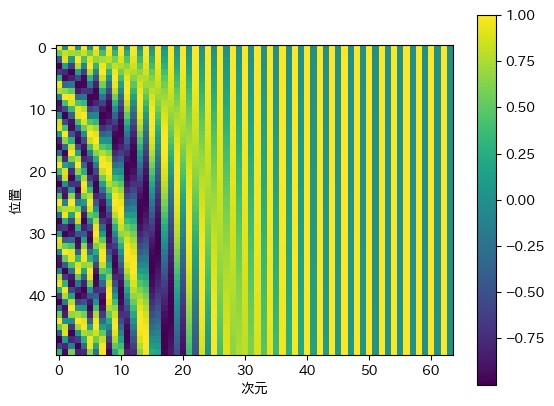

In [3]:
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np

K = 50 # 単語列の最大長
D = 64 # 埋め込み次元数(偶数)

# 位置符号行列の初期化
pos_enc = np.empty((K,D))

for i in range(K): # 単語位置 i
    for k in range(D // 2): # kの値
        theta = i / (10000 ** (2 * k / D))
        pos_enc[i, 2 * k + 1] = np.sin(theta)
        pos_enc[i, 2 * k] = np.cos(theta)

# 行列を画像で表示
im = plt.imshow(pos_enc)
plt.xlabel('次元')
plt.ylabel('位置')
plt.colorbar(im)
plt.show()

位置符号同士(i,j)での内積値の可視化

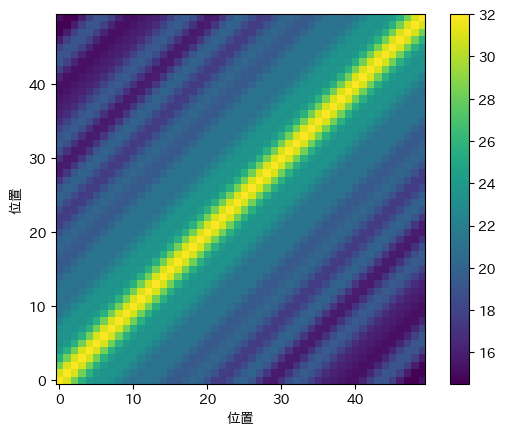

In [4]:
dot_matrix = np.matmul(pos_enc, pos_enc.T)
im = plt.imshow(dot_matrix, origin='lower')
plt.xlabel('位置')
plt.ylabel('位置')
plt.colorbar(im)
plt.show()